In [1]:
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

/home/seungsu/venv/opencv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

In [3]:
import pandas as pd

boston_pd = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_pd['PRICE'] = boston.target

boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
import plotly.express as px

fig = px.histogram(boston_pd, x='PRICE')
fig.show()

<AxesSubplot: >

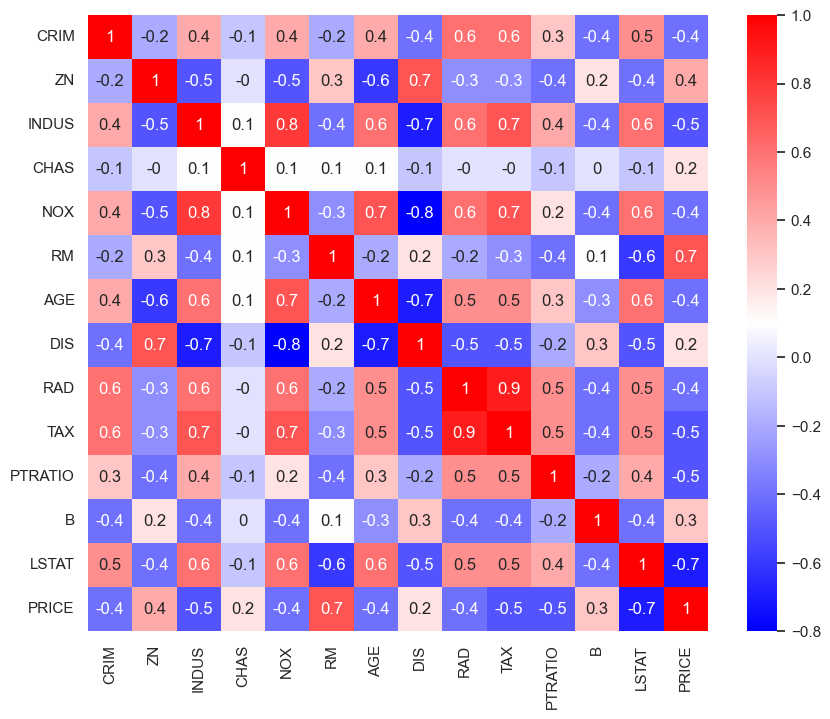

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

corr_mat = boston_pd.corr().round(1)
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data=corr_mat, annot = True, cmap = 'bwr')

<AxesSubplot: xlabel='LSTAT', ylabel='PRICE'>

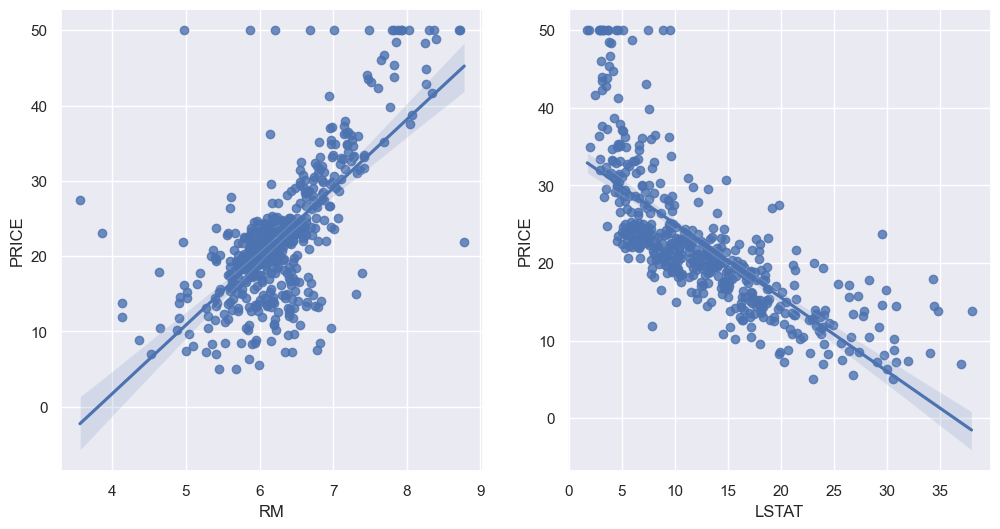

In [11]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize' : (12,6)})
fig, ax = plt.subplots(ncols=2)

sns.regplot(x='RM', y='PRICE', data = boston_pd, ax=ax[0])
sns.regplot(x='LSTAT', y='PRICE', data = boston_pd, ax=ax[1])

In [12]:
from random import random
from matplotlib import test
from sklearn.model_selection import train_test_split

X = boston_pd.drop('PRICE', axis =1)
y = boston_pd['PRICE']

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


In [13]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

# RMSE란
    에러 제곱 평균 루트 값 
    회귀 모델 평가할때 사용

In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(x_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('rmse of train data: ', rmse_tr)
print('rmse of test data: ', rmse_test)


rmse of train data:  4.642806069019824
rmse of test data:  4.9313525841467065


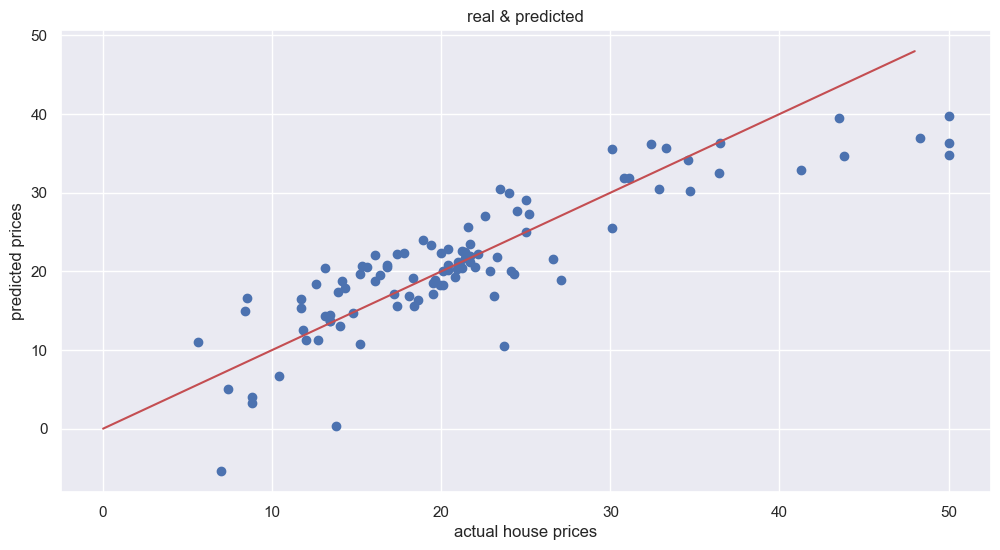

In [15]:
plt.scatter(y_test, pred_test)
plt.xlabel('actual house prices')
plt.ylabel('predicted prices')
plt.title('real & predicted')
plt.plot([0,48], [0,48], 'r')
plt.show()

In [17]:
X = boston_pd.drop(['PRICE', 'LSTAT'], axis =1)
y = boston_pd['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2 , random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [23]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr= (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

rmse_tr

5.165137874244864

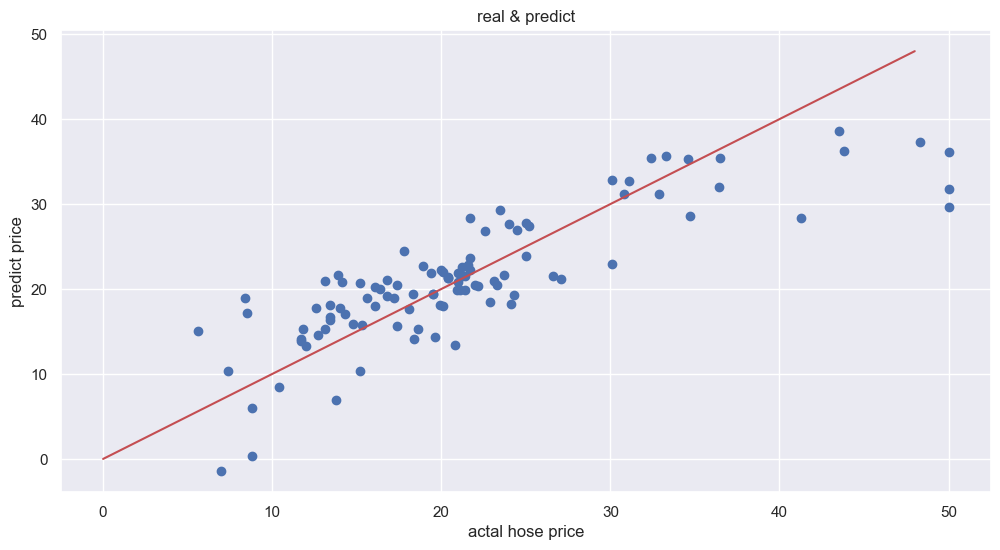

In [24]:
plt.scatter(y_test, pred_test)
plt.xlabel('actal hose price')
plt.ylabel('predict price')
plt.title("real & predict")
plt.plot([0,48],[0,48], 'r')
plt.show()